### Adagrad

In [ ]:
"""
# Adagrad in Linear Regression

## Overview
Adagrad (Adaptive Gradient Algorithm) is an optimization algorithm designed to improve the performance of gradient descent by adapting the learning rate for each parameter. It is particularly useful in scenarios where features have different frequencies of occurrence. The core idea is to perform larger updates for parameters associated with infrequent features and smaller updates for parameters associated with frequent features.

## How Adagrad Works
1. **Initialization**:
   - Start with initial weights \( W(0) \) and an accumulated gradient vector \( G(0) \) initialized to zero.
   - Define a learning rate \( \alpha \) and a small positive value \( \epsilon \) to prevent division by zero.

2. **Iterative Updates**:
   - For each iteration \( k \):
     - Compute the gradient of the loss function \( \nabla L(W(k)) \).
     - Update the accumulated gradient:
       \[
       G(k) = G(k-1) + [\nabla L(W(k))]^2
       \]
     - Update the weights:
       \[
       W(k+1) = W(k) - \frac{\alpha}{\sqrt{G(k)} + \epsilon} \cdot \nabla L(W(k))
       \]

3. **Convergence**:
   - Repeat the process until a stopping criterion is met, such as when the gradient is below a certain threshold.

## Uses of Adagrad in Machine Learning
- **Adaptive Learning Rates**: Adagrad automatically adjusts the learning rate for each parameter based on the historical gradients, allowing for more efficient training.
- **Sparse Data**: It is particularly effective for problems with sparse data, such as natural language processing and image recognition, where some features may be infrequent.
- **Faster Convergence**: By adapting the learning rate, Adagrad can lead to faster convergence in some cases compared to standard gradient descent.

## Limitations of Adagrad
- **Learning Rate Decay**: One of the main limitations of Adagrad is that the learning rate can become too small over time, leading to premature convergence and suboptimal solutions.
- **Not Suitable for Non-Stationary Objectives**: Adagrad may not perform well in scenarios where the objective function changes over time, as it accumulates gradients indefinitely.
- **Memory Usage**: The need to store the accumulated gradients for each parameter can lead to increased memory usage, especially in high-dimensional spaces.

## Comparison with Other Optimization Algorithms
- **SGD (Stochastic Gradient Descent)**: Unlike SGD, which uses a fixed learning rate, Adagrad adapts the learning rate based on the historical gradients.
- **RMSprop**: RMSprop is a variant of Adagrad that addresses the learning rate decay issue by using a moving average of the squared gradients instead of accumulating them indefinitely.
"""

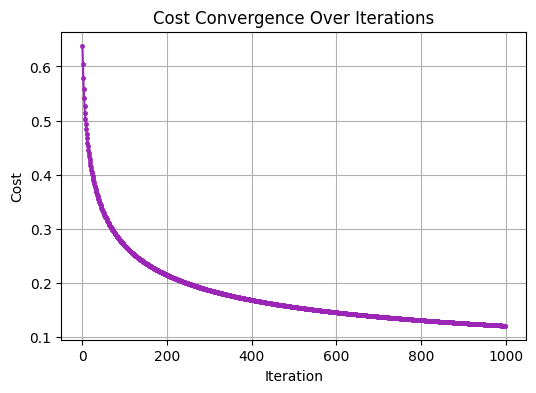

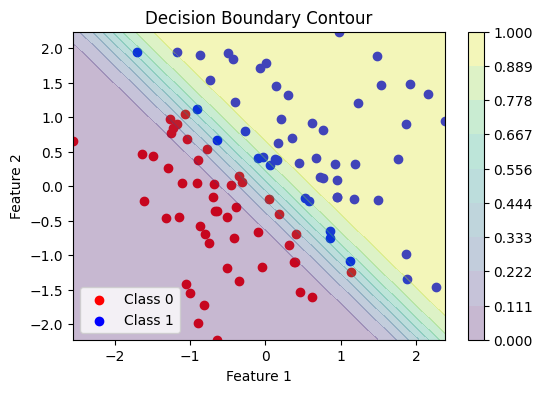

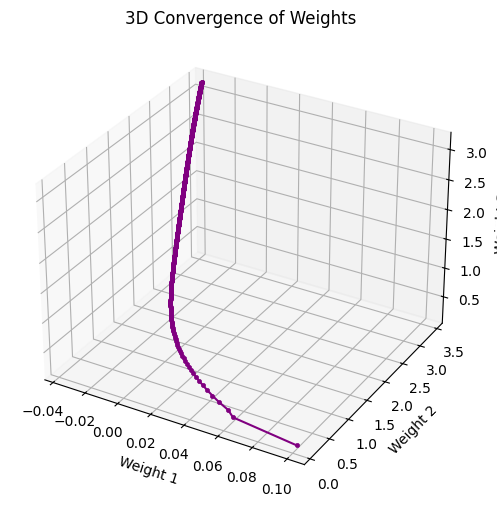

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class CustomAdagrad:
    def __init__(self, alpha=0.01, epsilon=1e-8, max_iters=1000):
        """
        Initialize Adagrad optimizer with specified learning rate, small constant epsilon, and max iterations.
        """
        self.alpha = alpha
        self.epsilon = epsilon
        self.max_iters = max_iters

    def minimize(self, cost_func, grad_func, init_weights):

        weights = init_weights
        accum_grad_sq = np.zeros_like(weights)  # Accumulated squared gradients
        cost_history = []
        grad_magnitudes = []
        weights_history = []

        for iteration in range(self.max_iters):
            grad = grad_func(weights)
            grad_magnitude = np.linalg.norm(grad)
            grad_magnitudes.append(grad_magnitude)

            accum_grad_sq += grad ** 2
            weights -= (self.alpha / (np.sqrt(accum_grad_sq) + self.epsilon)) * grad

            current_cost = cost_func(weights)
            cost_history.append(current_cost)
            weights_history.append(weights.copy())

            if grad_magnitude < self.epsilon:
                print("Convergence achieved.")
                break

        return weights, cost_history, grad_magnitudes, weights_history

# Logistic Regression Cost and Gradient
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_cost(weights, X, y):
    m = len(y)
    h = sigmoid(X @ weights)
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def logistic_gradient(weights, X, y):
    m = len(y)
    h = sigmoid(X @ weights)
    grad = (1 / m) * X.T @ (h - y)
    return grad

# Visualization Functions
def plot_cost_convergence(cost_history):
    plt.figure(figsize=(6, 4))
    plt.plot(cost_history, color='#9B26B6', marker='o', markersize=3, markeredgewidth=0.5)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost Convergence Over Iterations')
    plt.grid(True)
    plt.show()

def plot_contour(weights, X, y):
    plt.figure(figsize=(6, 4))
    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], color='red', label='Class 0')
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], color='blue', label='Class 1')

    x_min, x_max = X[:, 1].min(), X[:, 1].max()
    y_min, y_max = X[:, 2].min(), X[:, 2].max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = sigmoid(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()] @ weights)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, levels=np.linspace(0, 1, 10), cmap='viridis')
    plt.colorbar()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary Contour')
    plt.legend()
    plt.show()

def plot_3d_weights_convergence(weights_history):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    weights_history = np.array(weights_history)

    ax.plot(weights_history[:, 0], weights_history[:, 1], weights_history[:, 2], marker='o', color='purple', markersize=3, markeredgewidth=0.5)
    ax.set_xlabel('Weight 1')
    ax.set_ylabel('Weight 2')
    ax.set_zlabel('Weight 3')
    ax.set_title('3D Convergence of Weights')
    plt.show()

# Example
if __name__ == "__main__":
    np.random.seed(0)
    num_samples = 100
    X = np.random.randn(num_samples, 2)
    y = (X[:, 0] + X[:, 1] > 0).astype(int)

    # Add intercept term to X
    X_with_intercept = np.c_[np.ones((num_samples, 1)), X]

    # Initialize Adagrad optimizer
    optimizer = CustomAdagrad(alpha=0.1, epsilon=1e-8, max_iters=1000)
    initial_weights = np.zeros(X_with_intercept.shape[1])

    # Optimize weights
    final_weights, cost_history, grad_magnitudes, weights_history = optimizer.minimize(
        lambda w: logistic_cost(w, X_with_intercept, y),
        lambda w: logistic_gradient(w, X_with_intercept, y),
        initial_weights
    )

    # Plot results
    plot_cost_convergence(cost_history)
    plot_contour(final_weights, X_with_intercept, y)
    plot_3d_weights_convergence(weights_history)
